<a href="https://colab.research.google.com/github/DeepikaJ08/ETLHive-DeepLearning/blob/main/Class_02_27_04_Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in Keras

## Step 1: Read the data

### Target feature - PE (Power Plant Energy Output)

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 2: Perform basic quality data checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)
# checking % of dulplicated rows. here is very less so not deleting

0.004285117056856187

## Step 3: Separate X and Y

In [ ]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4: Create a preprocessing Pipeline for X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


## Step 5: Apply Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


## STep 6: Build the Keras Neural Network

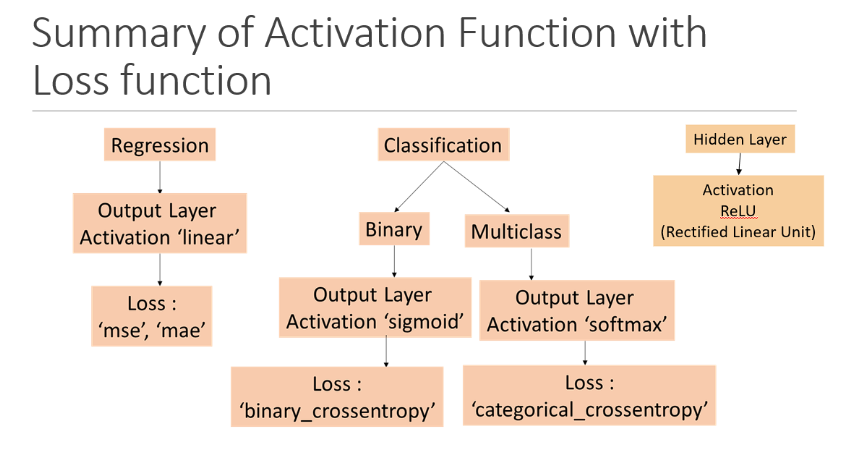

In [ ]:
xtrain.shape[1] #gives number of columns

4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Initializa the Sequential model
model = Sequential()

# Add the imput layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Hidden layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden layer 2
model.add(Dense(units=4, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 5ms/step - loss: 452.7403 - mae: 452.7403 - val_loss: 449.4566 - val_mae: 449.4566
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 443.1951 - mae: 443.1951 - val_loss: 431.7743 - val_mae: 431.7743
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 412.5780 - mae: 412.5780 - val_loss: 385.8424 - val_mae: 385.8424
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 347.2097 - mae: 347.2097 - val_loss: 299.1637 - val_mae: 299.1637
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 238.6095 - mae: 238.6095 - val_loss: 176.6291 - val_mae: 176.6291
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 144.1488 - mae: 144.1488 - val_loss: 129.1167 - val_mae: 129.1167
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 119.9330 - mae: 119.9330 - val_loss: 115.6508 - val_mae: 115.6508
Epoch 8/100
1

## Step 7: Evaluate the model in Train and Test

In [ ]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step - loss: 3.6708 - mae: 3.6708


[3.670783281326294, 3.670783281326294]

In [ ]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 3ms/step - loss: 3.5826 - mae: 3.5826


[3.58256459236145, 3.58256459236145]

## Step 8: Plot the Learning Curve i.e. Loss Function

In [ ]:
hist.history['loss']

[452.7403259277344,
 443.1950988769531,
 412.5779724121094,
 347.2096862792969,
 238.6095428466797,
 144.14881896972656,
 119.93302917480469,
 107.42037963867188,
 94.07113647460938,
 78.66947174072266,
 59.93022537231445,
 39.19133377075195,
 22.90439796447754,
 14.524090766906738,
 9.849157333374023,
 7.117977142333984,
 5.617381572723389,
 4.833255290985107,
 4.415663242340088,
 4.12888240814209,
 4.021901607513428,
 3.9368977546691895,
 3.9089884757995605,
 3.881927013397217,
 3.8385071754455566,
 3.815751791000366,
 3.806884527206421,
 3.754943370819092,
 3.7513864040374756,
 3.736161231994629,
 3.7447116374969482,
 3.7283577919006348,
 3.713669538497925,
 3.699298143386841,
 3.708148956298828,
 3.700237274169922,
 3.6974315643310547,
 3.6868815422058105,
 3.6915791034698486,
 3.7050046920776367,
 3.688717842102051,
 3.6997599601745605,
 3.6978814601898193,
 3.6875698566436768,
 3.687290668487549,
 3.682340383529663,
 3.7048561573028564,
 3.6810193061828613,
 3.688971519470215,
 3

In [ ]:
hist.history['val_loss']

[449.4566345214844,
 431.7743225097656,
 385.8423767089844,
 299.1637268066406,
 176.6291046142578,
 129.11672973632812,
 115.65083312988281,
 102.80195617675781,
 88.1834716796875,
 71.23973083496094,
 50.9969367980957,
 30.594356536865234,
 18.54728126525879,
 12.218259811401367,
 8.561302185058594,
 6.381150245666504,
 5.175917148590088,
 4.540311336517334,
 4.216394901275635,
 4.017731666564941,
 3.9125449657440186,
 3.88370943069458,
 3.8447632789611816,
 3.7180471420288086,
 3.784870147705078,
 3.7197437286376953,
 3.6217730045318604,
 3.6246345043182373,
 3.6307661533355713,
 3.581544876098633,
 3.5941176414489746,
 3.645820140838623,
 3.550306797027588,
 3.567111015319824,
 3.5952696800231934,
 3.5814738273620605,
 3.557297706604004,
 3.5236196517944336,
 3.5738654136657715,
 3.5149660110473633,
 3.636812448501587,
 3.5418426990509033,
 3.5004138946533203,
 3.510478973388672,
 3.5571506023406982,
 3.619711399078369,
 3.514773368835449,
 3.519707679748535,
 3.5182979106903076,
 

In [ ]:
hist.history['mae']

[452.7403259277344,
 443.1950988769531,
 412.5779724121094,
 347.2096862792969,
 238.6095428466797,
 144.14881896972656,
 119.93302917480469,
 107.42037963867188,
 94.07113647460938,
 78.66947174072266,
 59.93022537231445,
 39.19133377075195,
 22.90439796447754,
 14.524090766906738,
 9.849157333374023,
 7.117977142333984,
 5.617381572723389,
 4.833255290985107,
 4.415663242340088,
 4.12888240814209,
 4.021901607513428,
 3.9368977546691895,
 3.9089884757995605,
 3.881927013397217,
 3.8385071754455566,
 3.815751791000366,
 3.806884527206421,
 3.754943370819092,
 3.7513864040374756,
 3.736161231994629,
 3.7447116374969482,
 3.7283577919006348,
 3.713669538497925,
 3.699298143386841,
 3.708148956298828,
 3.700237274169922,
 3.6974315643310547,
 3.6868815422058105,
 3.6915791034698486,
 3.7050046920776367,
 3.688717842102051,
 3.6997599601745605,
 3.6978814601898193,
 3.6875698566436768,
 3.687290668487549,
 3.682340383529663,
 3.7048561573028564,
 3.6810193061828613,
 3.688971519470215,
 3

In [ ]:
hist.history['val_mae']

[449.4566345214844,
 431.7743225097656,
 385.8423767089844,
 299.1637268066406,
 176.6291046142578,
 129.11672973632812,
 115.65083312988281,
 102.80195617675781,
 88.1834716796875,
 71.23973083496094,
 50.9969367980957,
 30.594356536865234,
 18.54728126525879,
 12.218259811401367,
 8.561302185058594,
 6.381150245666504,
 5.175917148590088,
 4.540311336517334,
 4.216394901275635,
 4.017731666564941,
 3.9125449657440186,
 3.88370943069458,
 3.8447632789611816,
 3.7180471420288086,
 3.784870147705078,
 3.7197437286376953,
 3.6217730045318604,
 3.6246345043182373,
 3.6307661533355713,
 3.581544876098633,
 3.5941176414489746,
 3.645820140838623,
 3.550306797027588,
 3.567111015319824,
 3.5952696800231934,
 3.5814738273620605,
 3.557297706604004,
 3.5236196517944336,
 3.5738654136657715,
 3.5149660110473633,
 3.636812448501587,
 3.5418426990509033,
 3.5004138946533203,
 3.510478973388672,
 3.5571506023406982,
 3.619711399078369,
 3.514773368835449,
 3.519707679748535,
 3.5182979106903076,
 

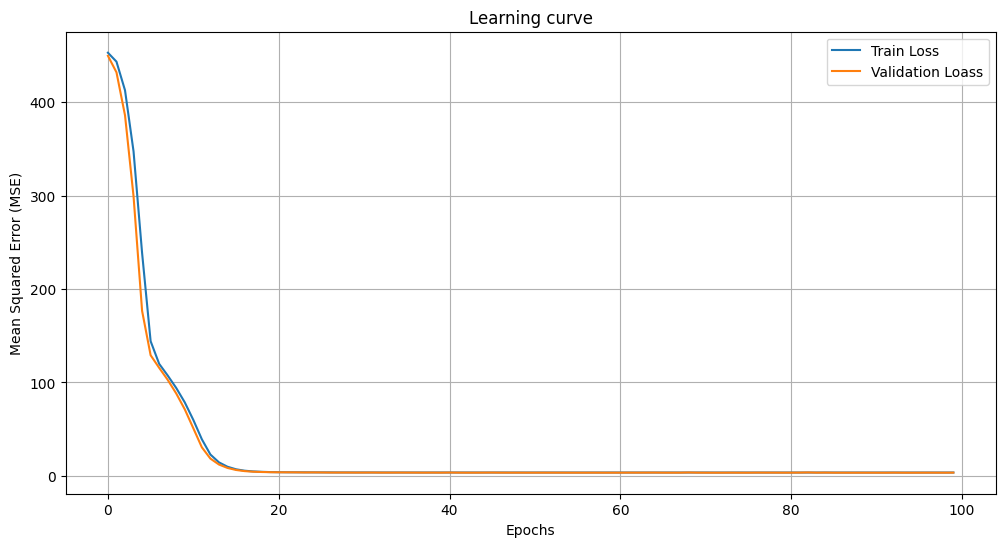

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loass')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title("Learning curve")
plt.legend()
plt.grid()
plt.show()

## Step 9: predict the results for Train & Test

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [ ]:
ypred_train[0:5]

array([[440.8649 ],
       [434.31052],
       [432.41757],
       [425.42645],
       [430.60583]], dtype=float32)

In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
ypred_test[0:5]

array([[434.61295],
       [435.81625],
       [461.6749 ],
       [477.78754],
       [433.3986 ]], dtype=float32)

In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


## Step 10: Perform Detailed Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred) # actual vs. predicted
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred) # actual vs. predicted
  r2 = r2_score(y, ypred) # actual vs. predicted
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [ ]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 0s 2ms/step
Mean Squared Error : 22.48
Root Mean Squared Error : 4.74
Mean Absolute Error : 3.67
R2 Score : 0.9232


In [ ]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 4ms/step
Mean Squared Error : 21.16
Root Mean Squared Error : 4.60
Mean Absolute Error : 3.58
R2 Score : 0.9261


#### CONCLUSION: R2 score in test is 0.9336 i.e. >0.8; hence above model is very good

## Step 11: Save above model (.keras --> extension)

In [ ]:
model.save('class 02 - PowerPlantOutput.keras')

## Step 12 - Load above model

#### this can be loaded in any notebook created in google collab using the path link

path link: left pane --> Folder icon --> click on the file --> ciick on 3 dots or right-click --> copy path

In [ ]:
from keras.models import load_model

In [ ]:
m = load_model('/content/class 02 - PowerPlantOutput.keras')

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
m.weights # give weightages of all elements in the model like bias

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.7088201 , -0.6692134 ,  0.9104007 ,  0.43324077, -0.14647137,
         -0.43589756, -0.7213029 , -0.9219161 ],
        [ 0.838732  , -0.20357375,  0.5034175 ,  0.10197243,  0.9815659 ,
         -1.0595034 , -0.26984644, -1.4182634 ],
        [-0.10352921,  0.46530125,  0.29061937,  0.21488245, -0.1019908 ,
          0.59896463, -0.98624885, -0.03974943],
        [ 0.66285706,  0.3855759 , -0.3230511 , -0.8477075 , -0.4259873 ,
          0.3437767 ,  0.55386406, -0.35891938]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([3.0965173, 3.4526908, 3.1454012, 3.2310297, 2.9629772, 3.280058 ,
        3.3210545, 3.4681118], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-0.6240535 ,  1.3494104 ,  2.446757  ,  2.4187608 ],
        [-0.87661546,  2.2945175 ,  1.5217185 ,  1.8025059 ],
        [ 0.47025302,  2.0255895 ,  2.026795  , 